In [242]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

In [243]:
train_data = pd.read_csv('train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


浏览数据，通过人类直觉认为，与乘客存活与否存在相关的特征可能有

Pclass 乘客舱位，1等舱付出了更多的票价，是否可能有更多的生存几率？
Sex   性别，关键特征，从对历史及电影观察来看，女性有着远比男士高的生存几率，理应相关。
Age   年龄，小孩与老人为弱势群体，是否在救生中获得了更多的照顾，从而生存几率更高？或者因为行动慢不能自理从而有着更低的生存率？又或者两者抵        消，从该特征无法看出相关性？
SibSp  同龄兄弟姐妹数量，应有一定相关性，因兄弟姐妹彼此可以互相帮助，不会轻易丢下彼此
Parch  乘客父母与小孩的数量，同上
Fare   与乘客舱位相同，应有相同相关性，很有可能需特征融合
Cabin  客舱，有可能客舱位置分布不同，受撞击冰山影响不同，逃离到逃生船距离不同，从而某些客舱有着更高的生存几率

理应不相关或较少可能存在相关性的特征有：
乘客ID  此顺序从kaggle平台上并不能发现与其他特征的相关性
Name   姓名，浏览数据中发现Name列中姓名有不同的前缀，Mrs，Miss等，其中对男女的不同称呼与Sex特征可完全融合，但仍存在Dr.等表明高素质人群的前         缀，高素质人群可能有着更完善的自救知识，从而生存率更高
Ticket  船票信息，无序，无规律，从人类直觉来看也不应存在任何相关性。
Embarked 登船港口，人类直觉来看相关性极低，从不同港口售票所导致的舱位不同也与Cabin高度融合。

所以最终要分析的特征如下：Sex;Age;Pclass;Fare;Cabin;SibSp;Parch;Name,共8个，顺序按本人直觉相关度由高到低排列。

鉴于为从多种特征中寻找模式来预测乘客是否生存，为预测0或者1的问题，所以暂定使用逻辑回归算法。

查看数据是否有缺失值，及其数据类型

In [244]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [245]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


以上两行代码得到：共有891行信息，即891名乘客。age特征只有714行，carbin只有204行，embarked仅缺失两行，为889行。
Survived列  mean得到0.383838也就是38.3838%的人最终获救；
Pclass列   mean得到一等舱人数较少，符合人类直觉；
Age列     得到平均年龄约29.7岁，最小的只有不到半岁，最大的80岁；虽然Age有缺失项，但pandas的describe函数会略掉缺失数据。
从SibSp，Parch得到  跟随亲人结伴出行的人占比不小；
Fare列则看不出什么

看完了列表所展示的一维数据，下面我们要通过图形看一下分布数据所带来的信息，看完成员分布之后，我们还要看一下每个特征下的不同，生存率会产生怎样的变化。（甚至之后可以看一下两组特征聚合的变化，例如头等舱的男女生存率与3等舱有什么区别）前者使用以特征值为Y轴，生存与否的0或者1为x轴即可，而后者我们要以特征值为x轴，生存者与遇难者的数量为y轴，并且用相连的柱状图表示。

In [246]:
train_data.Age.value_counts() #先看一下年龄分布

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

特征中Age有0-85不同的值，显然是没必要的，本人决定以儿童(0-14)，少年(14-22)，中年(22-45)，老年（45-）四大类来做区间分类，儿童和老人一般在遇到事故之后无法通过本人得以自救，而少年和中年则相反，中年也许因为更加稳重从而生存率比少年高。增加一列Ages表达四类

In [247]:
def AgeClass(age):
    if age > 0 and age <= 14:
        return 'child'
    elif age>14 and age <= 22:
        return 'young'
    elif age>22 and age <= 45:
        return 'mid'
    elif age>45:
        return 'old'
train_data['Ages'] = train_data.Age.apply(AgeClass)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ages
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,mid
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,mid
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,mid
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,mid
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,None
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,old
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,mid
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


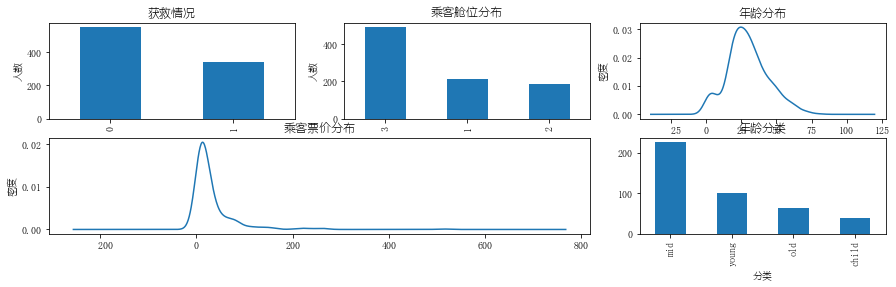

In [248]:
import matplotlib.pyplot as plt
fig = plt.figure(2) #创建图形窗口
plt.figure(figsize=(15,6)) #在jupyter正好的九宫图尺寸

plt.subplot2grid((3,3), (0,0)) #暂定为9张图（8个特征+生存占比）
train_data.Survived.value_counts().plot(kind='bar')
plt.title('获救情况') #因使用python3默认为unicode字符串，所以就不用加前缀u了
plt.ylabel('人数')

plt.subplot2grid((3,3),(0,1)) #重复
train_data.Pclass.value_counts().plot(kind='bar')
plt.ylabel('人数')
plt.title('乘客舱位分布')

'''plt.subplot2grid((3,3),(0,2)) 
train_data.Age.value_counts().plot(kind='bar')
plt.ylabel('人数')
plt.title('年龄')

plt.subplot2grid((3,3),(1,2)) 
plt.scatter(train_data.Survived, train_data.Age)
plt.ylabel('年龄')
plt.title('年龄分布')
失败的尝试，年龄不应该等区间分布，也不应该单柱状图
'''

plt.subplot2grid((3,3),(0,2)) #重复
train_data.Age.plot(kind='kde')
plt.xlabel('年龄')
plt.ylabel('密度')
plt.title('年龄分布')

plt.subplot2grid((3,3),(1,0),colspan = 2) #重复
train_data.Fare.plot(kind='kde')
plt.ylabel('密度')
plt.title('乘客票价分布')




plt.subplot2grid((3,3),(1,2)) #重复
train_data.Ages[train_data.Survived == 1].value_counts().plot(kind = 'bar')
train_data.Ages[train_data.Survived == 0].value_counts().plot(kind = 'bar')
plt.xlabel('分类')
plt.title('年龄分类')


plt.show()

刚对Ages分类下了一番功夫，我也就打算直接从Ages开始分析与生存率的关系

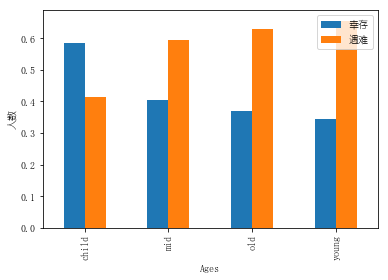

In [249]:
fig = plt.figure()

Survived_0 = train_data.Ages[train_data.Survived == 0].value_counts()/train_data.Ages.value_counts()
Survived_1 = train_data.Ages[train_data.Survived == 1].value_counts()/train_data.Ages.value_counts()
df = pd.DataFrame({'幸存':Survived_1, '遇难':Survived_0})
df.plot(kind = 'bar')
plt.xlabel('Ages')
plt.ylabel('人数')

plt.show()

In [250]:
Survived_1 / Survived_0

child    1.406250
mid      0.681416
old      0.584615
young    0.524752
Name: Ages, dtype: float64

以上我们得出，0-14的儿童生存率最高，然后是mid，然后是old，然后是young
下面再看一下比较感兴趣的sex与pclass

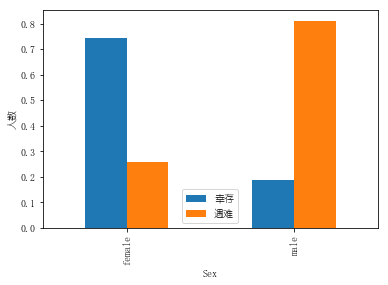

In [251]:
fig = plt.figure()

Survived_0 = train_data.Sex[train_data.Survived == 0].value_counts()/train_data.Sex.value_counts()
Survived_1 = train_data.Sex[train_data.Survived == 1].value_counts()/train_data.Sex.value_counts()
df = pd.DataFrame({'幸存':Survived_1, '遇难':Survived_0})
df.plot(kind = 'bar')
plt.xlabel('Sex')
plt.ylabel('人数')

plt.show()

如预料一样，女性生存几率远高于男性

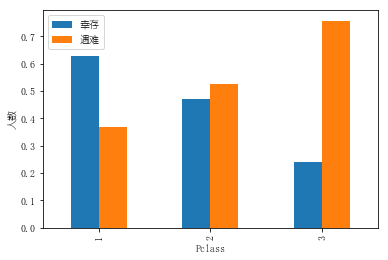

In [252]:
fig = plt.figure()

Survived_0 = train_data.Pclass[train_data.Survived == 0].value_counts()/train_data.Pclass.value_counts()
Survived_1 = train_data.Pclass[train_data.Survived == 1].value_counts()/train_data.Pclass.value_counts()
df = pd.DataFrame({'幸存':Survived_1, '遇难':Survived_0})
df.plot(kind = 'bar')
plt.xlabel('Pclass')
plt.ylabel('人数')

plt.show()

Pclass揭露了现实主义的重要性，越好的舱位生存几率越大，3等舱生存几率最小

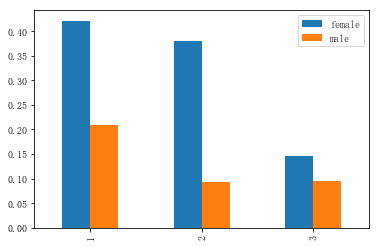

In [253]:
fig = plt.figure()


Survived_female = train_data.Pclass[train_data.Survived == 1][train_data.Sex == 'female'].value_counts()/train_data.Pclass.value_counts()
Survived_male = train_data.Pclass[train_data.Survived == 1][train_data.Sex == 'male'].value_counts()/train_data.Pclass.value_counts()
df = pd.DataFrame({'male':Survived_male, 'female':Survived_female})
df.plot(kind = 'bar')
plt.show()

将舱位与性别联合起来后发现，在3等舱女性生存几率要远小于1/2等舱，2/3等舱男性生存几率几乎相同，1等舱男性生存几率甚至高于3等舱女性生存几率

对Age进行特征工程

In [254]:
from sklearn.ensemble import RandomForestRegressor

def SetMissingAges(df):
    age_df = df[['Age','Pclass', 'Survived', 'Parch', 'Fare']] #按照数值特征补足
    
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()
    
    y = known_age[:, 0]
    x = known_age[:, 1:]
    
    rfr = RandomForestRegressor(random_state = 50, n_estimators = 100, max_depth = 100, n_jobs = -1)
    rfr.fit(x, y)
    
    predictAges = rfr.predict(unknown_age[:,1:])
    
    df.loc[(df.Age.isnull()), 'Age'] = predictAges #填充缺失Age数据的行与Age列交叉获得的年龄值
    
    return df, rfr

def SetCabinType(df):
    df.loc[(df.Cabin.notnull()), 'Cabin'] = 1
    df.loc[(df.Cabin.isnull()), 'Cabin'] = 0
    return df

train_data, rfr = SetMissingAges(train_data)
train_data = SetCabinType(train_data)
    
    

再对后加入的年龄分类用AgeClass分类下

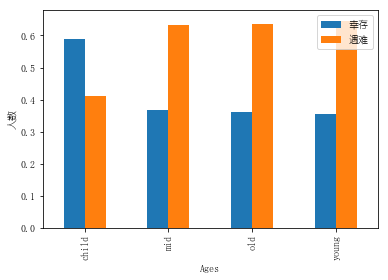

In [255]:
def AgeClass(age):
    if age > 0 and age <= 14:
        return 'child'
    elif age>14 and age <= 22:
        return 'young'
    elif age>22 and age <= 45:
        return 'mid'
    elif age>45:
        return 'old'
train_data['Ages'] = train_data.Age.apply(AgeClass)


fig = plt.figure()

Survived_0 = train_data.Ages[train_data.Survived == 0].value_counts()/train_data.Ages.value_counts()
Survived_1 = train_data.Ages[train_data.Survived == 1].value_counts()/train_data.Ages.value_counts()
df = pd.DataFrame({'幸存':Survived_1, '遇难':Survived_0})
df.plot(kind = 'bar')
plt.xlabel('Ages')
plt.ylabel('人数')

plt.show()

事实上我在这里做了诸多尝试，最终发现去掉SibSp情况下，拟合数据的柱状图与之前较为相似，其他情况child均发生了较大改变

In [256]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ages
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,S,young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,1,C,mid
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,S,mid
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,1,S,mid
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,S,mid
5,6,0,3,"Moran, Mr. James",male,23.173893,0,0,330877,8.4583,0,Q,mid
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,1,S,old
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,0,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,0,S,mid
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,0,C,child


下面就可以使用逻辑回归来预测了，模型是只能接受数值型数据的，所以我们要将非数值转为数值数据与特征缩放，pandas的get_dummies可以完成这个任务

In [257]:
dummies_Sex = pd.get_dummies(train_data['Sex'], prefix = 'Sex')
dummies_Ages = pd.get_dummies(train_data['Ages'], prefix = 'Ages')
dummies_Pclass= pd.get_dummies(train_data['Pclass'], prefix = 'Pclass')

df = pd.concat([train_data, dummies_Sex, dummies_Ages, dummies_Pclass], axis = 1)
df.drop(['Name', 'Sex', 'Ticket', 'Embarked', 'Ages', 'Pclass', 'Age', 'Fare', 'Embarked'], axis = 1, inplace = True)
df

,PassengerId,Survived,SibSp,Parch,Cabin,Sex_female,Sex_male,Ages_child,Ages_mid,Ages_old,Ages_young,Pclass_1,Pclass_2,Pclass_3
0,1,0,1,0,0,0,1,0,0,0,1,0,0,1
1,2,1,1,0,1,1,0,0,1,0,0,1,0,0
2,3,1,0,0,0,1,0,0,1,0,0,0,0,1
3,4,1,1,0,1,1,0,0,1,0,0,1,0,0
4,5,0,0,0,0,0,1,0,1,0,0,0,0,1
5,6,0,0,0,0,0,1,0,1,0,0,0,0,1
6,7,0,0,0,1,0,1,0,0,1,0,1,0,0
7,8,0,3,1,0,0,1,1,0,0,0,0,0,1
8,9,1,0,2,0,1,0,0,1,0,0,0,0,1
9,10,1,1,0,0,1,0,1,0,0,0,0,1,0


In [258]:
train_df = df.filter(regex = 'Survived|Ages_.*|SibSp|Parch|Cabin|Sex_.*|Pclass_.*')
#因逻辑回归不能接受object数据类型，所以我们要对取出的数据进行一定修改

train_df = train_df.astype(int)
train_df.dtypes

Survived      int32
SibSp         int32
Parch         int32
Cabin         int32
Sex_female    int32
Sex_male      int32
Ages_child    int32
Ages_mid      int32
Ages_old      int32
Ages_young    int32
Pclass_1      int32
Pclass_2      int32
Pclass_3      int32
dtype: object

In [259]:
train_np = train_df.as_matrix()
train_np

array([[0, 1, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       ..., 
       [0, 1, 2, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [260]:
from sklearn import linear_model

y = train_np[:, 0]
x = train_np[:, 1:]

clf = linear_model.LogisticRegression()
clf.fit(x, y)

clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

大成功！回归模型创建完毕
下面可以暂时告别train数据，对test进行处理了,对test数据浏览后发现也缺少Age与Cabin

In [261]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,0,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,0,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,0,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,0,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,0,S


In [269]:
test_data = pd.read_csv('test.csv')

test_data.loc[ (test_data.Fare.isnull()), 'Fare' ] = 8
test_data = SetCabinType(test_data)

def SetMissingAges_for_Test(df):
    age_df = df[['Age','Pclass', 'Parch', 'Fare']]
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()

    y = known_age[:, 0]
    x = known_age[:, 1:]
    
    rfr.fit(x, y)
    
    predictAges = rfr.predict(unknown_age[:,1:])

    df.loc[(df.Age.isnull()), 'Age'] = predictAges
    
    return df

test_data = SetMissingAges_for_Test(test_data)

test_data['Ages'] = test_data.Age.apply(AgeClass)


dummies_Sex = pd.get_dummies(test_data['Sex'], prefix = 'Sex')
dummies_Ages = pd.get_dummies(test_data['Ages'], prefix = 'Ages')
dummies_Pclass= pd.get_dummies(test_data['Pclass'], prefix = 'Pclass')

df_test = pd.concat([test_data, dummies_Sex, dummies_Ages, dummies_Pclass], axis = 1)
df_test.drop(['Name', 'Sex', 'Ticket', 'Embarked', 'Ages', 'Pclass', 'Age', 'Fare', 'Embarked'], axis = 1, inplace = True)
df_test


,PassengerId,SibSp,Parch,Cabin,Sex_female,Sex_male,Ages_child,Ages_mid,Ages_old,Ages_young,Pclass_1,Pclass_2,Pclass_3
0,892,0,0,0,0,1,0,1,0,0,0,0,1
1,893,1,0,0,1,0,0,0,1,0,0,0,1
2,894,0,0,0,0,1,0,0,1,0,0,1,0
3,895,0,0,0,0,1,0,1,0,0,0,0,1
4,896,1,1,0,1,0,0,0,0,1,0,0,1
5,897,0,0,0,0,1,1,0,0,0,0,0,1
6,898,0,0,0,1,0,0,1,0,0,0,0,1
7,899,1,1,0,0,1,0,1,0,0,0,1,0
8,900,0,0,0,1,0,0,0,0,1,0,0,1
9,901,2,0,0,0,1,0,0,0,1,0,0,1


test数据处理完成，最终一步开始

In [271]:
test = df_test.filter(regex = 'Survived|Ages_.*|SibSp|Parch|Cabin|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':test_data['PassengerId'].as_matrix(), 'Survived':predictions.astype(int)})
result.to_csv('logistic_regression_predictions.csv', index = False)
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [272]:
pd.DataFrame({'columns':list(train_df.columns)[1:], 'coef': list(clf.coef_.T)})

,coef,columns
0,[-0.393507801906],SibSp
1,[-0.202360754801],Parch
2,[0.852067991654],Cabin
3,[1.44218854758],Sex_female
4,[-1.29020325602],Sex_male
5,[1.51091206222],Ages_child
6,[-0.23046375024],Ages_mid
7,[-1.01545480437],Ages_old
8,[-0.113008216047],Ages_young
9,[0.757790192866],Pclass_1


对模型系数与特征来看，基本符合预期，有兄弟姐妹父母子女与生存率负相关
女性高正相关，男性高负相关
年龄与我们之前的生存率柱状图一致
舱位与生存率关系也符合预期

下面进行一个非常简单快速的优化，即交叉验证

In [275]:
from sklearn import cross_validation

clf = linear_model.LogisticRegression()
x = train_np[:, 1:]
y = train_np[:, 0]

print (cross_validation.cross_val_score(clf, x, y, cv = 5))

[ 0.82681564  0.7877095   0.79213483  0.76404494  0.79661017]


D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [284]:
split_train, split_cv = cross_validation.train_test_split(df, test_size = 0.3, random_state = 0)
train_df = split_train.filter(regex = 'Survived|Ages_.*|SibSp|Parch|Cabin|Sex_.*|Pclass_.*')
train_df = train_df.astype(int)

clf = linear_model.LogisticRegression()
clf.fit(train_df.as_matrix()[:,1:], train_df.as_matrix()[:,0])

cv_df = split_cv.filter(regex = 'Survived|Ages_.*|SibSp|Parch|Cabin|Sex_.*|Pclass_.*')
predictions = clf.predict(cv_df.as_matrix()[:,1:])

result = pd.DataFrame({'PassengerId':split_cv['PassengerId'].as_matrix(), 'Survived':predictions.astype(int)})
result.to_csv('logistic_regression_predictions2.csv', index = False)
result


,PassengerId,Survived
0,496,0
1,649,0
2,279,0
3,32,1
4,256,1
5,299,1
6,610,1
7,319,1
8,485,0
9,368,1


In [ ]:
origin_data_train = pd.read_csv('train.csv')
bad_cases = origin_data_train.loc[origin_data_train['PassengerId'].isin(split_cv[predictions != cv_df.as_matrix()[:,0]]['PassengerId'].values)]
bad_cases